<a href="https://colab.research.google.com/github/Yusuprozimemet/GPS-Uyghur/blob/main/genetic_admixture_Uyghur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import folium
from matplotlib import cm

# Create a dark-themed map centered in Central Europe
map = folium.Map(location=[47.0, 15.0], zoom_start=4, tiles="CartoDB.DarkMatter")

# Define the data with locations, names, genetic distances, and time periods
locations = [
    {"name": "Hungary LN Lengyel", "coords": [47.0, 19.8], "distance": 0.28392096, "period": "5,000 BC - 4,000 BC"},
    {"name": "Hungary LBK Bivaly-Tó", "coords": [47.3, 19.1], "distance": 0.27016024, "period": "5,500 BC - 4,500 BC"},
    {"name": "Russia Boisman MN I1196", "coords": [43.7, 131.6], "distance": 0.45707309, "period": "4,000 BC - 3,000 BC"},
    {"name": "Russia Boisman MN I3356", "coords": [44.5, 132.5], "distance": 0.46501721, "period": "4,000 BC - 3,000 BC"},
    {"name": "Kazakhstan Taldysay", "coords": [50.5, 79.2], "distance": 0.15163356, "period": "2,000 BC - 1,200 BC"},
    {"name": "Israel MLBA I2190", "coords": [31.5, 34.8], "distance": 0.22366911, "period": "1,500 BC - 1,200 BC"},
    {"name": "Israel MLBA I4519", "coords": [32.0, 35.0], "distance": 0.24407318, "period": "1,500 BC - 1,200 BC"},
    {"name": "China Xinjiang Tielieketesai IA", "coords": [44.0, 87.6], "distance": 0.13352008, "period": "1,000 BC - 200 BC"},
    {"name": "China Xinjiang Caishichang IA-West Eurasian", "coords": [45.0, 89.0], "distance": 0.13943075, "period": "1,000 BC - 200 BC"},
    {"name": "Kazakhstan OtrarCulture LIA", "coords": [42.5, 69.5], "distance": 0.14240765, "period": "600 BC - 400 AD"},
    {"name": "Kazakhstan Karluk DA222_noUDG", "coords": [50.0, 70.0], "distance": 0.17536597, "period": "8th-10th century AD"},
    {"name": "Hungary Avar (Kunszállás:KFJ031)", "coords": [47.0, 19.4], "distance": 0.11627680, "period": "6th-9th century AD"},
    {"name": "Hungary EarlyMidAvar KPM-14", "coords": [47.2, 19.5], "distance": 0.20540892, "period": "7th-8th century AD"},
    {"name": "Hungary MidAvar KPM-23", "coords": [47.3, 19.2], "distance": 0.16604915, "period": "8th-9th century AD"},
    {"name": "Hungary MidAvar KDA-485", "coords": [47.1, 19.5], "distance": 0.20239007, "period": "8th-9th century AD"},
    {"name": "Hungary MidAvar SSD-198", "coords": [47.4, 19.3], "distance": 0.20932157, "period": "8th-9th century AD"},
    {"name": "Hungary Conqueror Commoner HMSZ-88.SG", "coords": [47.0, 19.4], "distance": 0.10428463, "period": "9th-10th century AD"},
    {"name": "Hungary Conqueror Commoner SH-81.SG", "coords": [47.3, 19.1], "distance": 0.16655200, "period": "9th-10th century AD"},
    {"name": "Hungary Conqueror Elite BK-2.SG", "coords": [47.1, 19.3], "distance": 0.12140622, "period": "9th-10th century AD"},
    {"name": "Hungary Conqueror Elite VPB-167.SG", "coords": [47.2, 19.5], "distance": 0.19770320, "period": "9th-10th century AD"},
    {"name": "Hungary Balatonszemes EMA Bal_143", "coords": [47.4, 19.2], "distance": 0.18246434, "period": "8th-9th century AD"},
    {"name": "Hungary Conqueror Commoner PLE-195.SG", "coords": [47.1, 19.4], "distance": 0.18941458, "period": "9th-10th century AD"},
    {"name": "Kazakhstan Karakhanid DA204_noUDG", "coords": [43.1, 68.2], "distance": 0.17066352, "period": "10th-12th century AD"},
    {"name": "Kazakhstan Karakhanid DA203", "coords": [43.0, 68.0], "distance": 0.17228136, "period": "10th-12th century AD"},
    {"name": "Hungary LBA Kyjatice I1504", "coords": [48.0, 20.2], "distance": 0.21284196, "period": "1,300 BC - 800 BC"},
    {"name": "Hungary Conqueror Commoner:SH-81.SG", "coords": [47.3, 19.1], "distance": 0.16655200, "period": "9th-10th century AD"}
]

# Define the periods in chronological order
periods = [
    "5,500 BC - 4,500 BC", "5,000 BC - 4,000 BC", "4,000 BC - 3,000 BC",
    "2,000 BC - 1,200 BC", "1,500 BC - 1,200 BC", "1,300 BC - 800 BC",
    "1,000 BC - 200 BC", "600 BC - 400 AD", "8th-10th century AD",
    "6th-9th century AD", "7th-8th century AD", "8th-9th century AD",
    "9th-10th century AD", "10th-12th century AD"
]

# Generate a gradient from red to yellow
cmap = cm.get_cmap("RdYlBu_r")
colors = [cmap(i / (len(periods) - 1)) for i in range(len(periods))]
period_colors = {
    period: f"#{int(r * 255):02x}{int(g * 255):02x}{int(b * 255):02x}"
    for period, (r, g, b, _) in zip(periods, colors)
}

# Normalize genetic distance for circle size
min_distance = min(loc["distance"] for loc in locations)
max_distance = max(loc["distance"] for loc in locations)
scale_factor = 200000  # Adjust this factor to change circle size scaling

# Add each location to the map with a marker and a circle
for loc in locations:
    circle_radius = scale_factor * (1 - (loc["distance"] - min_distance) / (max_distance - min_distance))
    folium.Circle(
        location=loc["coords"],
        radius=circle_radius,
        color=period_colors[loc["period"]],
        fill=True,
        fill_color=period_colors[loc["period"]],
        fill_opacity=0.5,
        popup=f'{loc["name"]}\nGenetic Distance: {loc["distance"]}\nTime Period: {loc["period"]}'
    ).add_to(map)

# Add a legend to the map
legend_html = '''
<div style="
position: fixed;
bottom: 50px;
left: 50px;
width: 200px;
height: auto;
background-color: white;
z-index: 1000;
padding: 10px;
border: 2px solid grey;
border-radius: 5px;
font-size: 12px;">
<h4 style="margin-top: 0; text-align: center;">Legend</h4>
{}
</div>
'''.format("".join([f'<p style="margin: 0;"><span style="display: inline-block; width: 12px; height: 12px; background-color: {color}; margin-right: 5px;"></span>{period}</p>' for period, color in period_colors.items()]))

map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file and display it
map.save('gradient_map_with_legend.html')
map


<ipython-input-15-893a2ef6d3d1>:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdYlBu_r")


In [49]:
import pandas as pd

# Data as a string
data = """Target,Distance,Eastern_European_Hunter_Gatherer,Amerindian,Zagros_Neolithic_Farmers,Siberian_Hunter_Gatherer,Early_Bronze_Age_Europe_Indoeuropean,Anatolia_Neolithic_Farmers,Caucasus_Hunter_Gatherer,Levant_Epipaleolithic,Western_European_Hunter_Gatherer,Yoruba
China_Xinjiang_Xiaohe_BA:L5209,0.20618299,34.4,24.0,22.0,18.2,1.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L5213,0.19840075,34.6,24.0,23.4,18.0,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6101,0.18298787,32.6,21.2,19.0,19.8,7.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6103,0.19897374,33.2,22.0,20.8,20.2,3.8,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6105,0.20897197,33.2,23.2,21.0,20.0,2.6,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA:L6106,0.19634048,34.6,22.8,21.8,19.0,1.8,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM100.SG,0.20210203,36.0,23.6,21.2,19.2,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM110.SG,0.19498016,34.8,21.4,22.8,18.8,2.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM135.SG,0.19453649,31.6,23.0,22.2,19.2,4.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Xiaohe_BA.SG:XHM75.SG,0.20782666,35.6,23.4,21.6,17.4,2.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Beifang_Xiaohe_BA.SG:GMGM1.SG,0.19207837,34.2,22.0,21.0,22.8,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Bolati_BA_Chemurcheck:C1707,0.10358884,15.6,6.4,13.6,11.2,42.4,0.0,10.8,0.0,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BN.SG,0.09825104,18.8,8.8,15.0,6.8,44.4,0.0,6.2,0.0,0.0,0.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BY.SG,0.09986119,14.0,6.6,14.2,12.4,47.4,0.0,5.4,0.0,0.0,0.0
China_Xinjiang_Ayituohan_BA_Afanasievo:C2034,0.08994669,13.6,6.2,11.6,13.2,45.2,0.0,10.2,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2040,0.10188766,10.8,10.8,21.8,10.8,41.6,0.0,4.2,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2045,0.09693696,11.4,8.6,18.6,15.6,45.8,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2046,0.11218144,13.8,9.6,11.6,19.4,38.0,0.0,7.6,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2047,0.10854949,19.2,10.2,11.2,24.6,23.4,0.0,11.4,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2048,0.10077308,17.6,7.6,29.0,10.4,28.0,0.0,7.4,0.0,0.0,0.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2049,0.10284658,19.8,10.2,5.0,18.8,31.0,0.0,15.2,0.0,0.0,0.0
China_Xinjiang_Chaganguole(Chagangole)_BA_Chemurcheck:C2037.SG,0.10119117,19.0,8.2,13.2,22.8,27.6,0.0,9.2,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo_oWestEurasia:C3341,0.08198052,8.4,4.0,0.0,0.0,69.8,0.0,17.8,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3339,0.10720997,12.8,9.8,13.2,14.4,43.4,0.0,6.4,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3340,0.08885191,20.8,7.6,16.6,10.2,41.4,0.0,3.4,0.0,0.0,0.0
China_Xinjiang_Habahe_BA:C794,0.07646363,6.4,4.6,6.0,17.0,58.8,0.0,7.2,0.0,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-2.SG,0.11250852,13.2,10.2,7.0,14.6,44.0,0.0,11.0,0.0,0.0,0.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-3N.SG,0.10473434,10.4,10.0,12.0,19.6,46.4,0.0,1.6,0.0,0.0,0.0
China_Xinjiang_Songshugou_Afanasievo_BA.SG:SSGM16.SG,0.11517782,17.0,7.6,9.4,8.2,47.4,0.0,10.4,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA_Afanasievo:C3343.SG,0.04073556,4.2,3.6,3.0,89.2,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA:C3344,0.10278829,21.8,7.2,14.0,17.6,28.6,0.0,10.8,0.0,0.0,0.0
China_Xinjiang_Songshugou_BA:C3349,0.11490991,17.8,8.0,13.0,9.4,40.8,0.0,11.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1701,0.09002086,14.8,7.0,8.2,10.0,46.6,0.0,13.4,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1703.SG,0.09404758,16.6,7.2,9.6,8.8,48.8,0.0,9.0,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1699,0.09959228,10.8,6.4,3.2,14.0,52.8,0.0,12.8,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1700,0.10505185,18.0,7.6,8.2,11.6,40.4,0.0,14.2,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1702,0.08891918,9.0,8.4,12.8,14.6,49.8,0.0,5.4,0.0,0.0,0.0
China_Xinjiang_Tuoganbai_BA:C1704,0.10721369,11.6,7.2,6.6,14.2,46.6,0.0,13.8,0.0,0.0,0.0
China_Xinjiang_Jirentaigoukou_LBA_Andronovo_Karasuk_possible:C1367,0.02937579,0.0,3.4,16.2,3.6,70.8,1.0,5.0,0.0,0.0,0.0
China_Xinjiang_Jirentaigoukou_LBA:C1365,0.02977965,0.4,2.0,10.4,0.0,87.2,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Kuokesuxi_LBA_Andronovo:C1662.SG,0.03122842,8.0,1.0,6.4,1.8,80.8,0.0,2.0,0.0,0.0,0.0
China_Xinjiang_Songshugou_LBA:C3348.SG,0.03319035,5.8,2.4,17.0,11.4,59.6,0.0,3.8,0.0,0.0,0.0
China_Xinjiang_Tangbalesayi_LBA_Andronovo:C1714.SG,0.03552786,2.8,0.0,4.8,1.0,91.4,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_Wutulan_LBA_Andronovo:C4282.SG,0.03698032,0.0,0.0,2.4,0.6,95.2,1.8,0.0,0.0,0.0,0.0
yusupancentry,0.09729617,0.0,1.6,11.0,24.8,29.0,16.8,3.8,8.2,4.2,0.6
Average,0.11384400,17.3,10.5,13.6,15.4,36.9,0.4,5.6,0.2,0.1,0.0
"""

# Convert the string data to a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Save as CSV
df.to_csv("output.csv", index=False)

print("CSV file saved as 'output.csv'")


CSV file saved as 'output.csv'


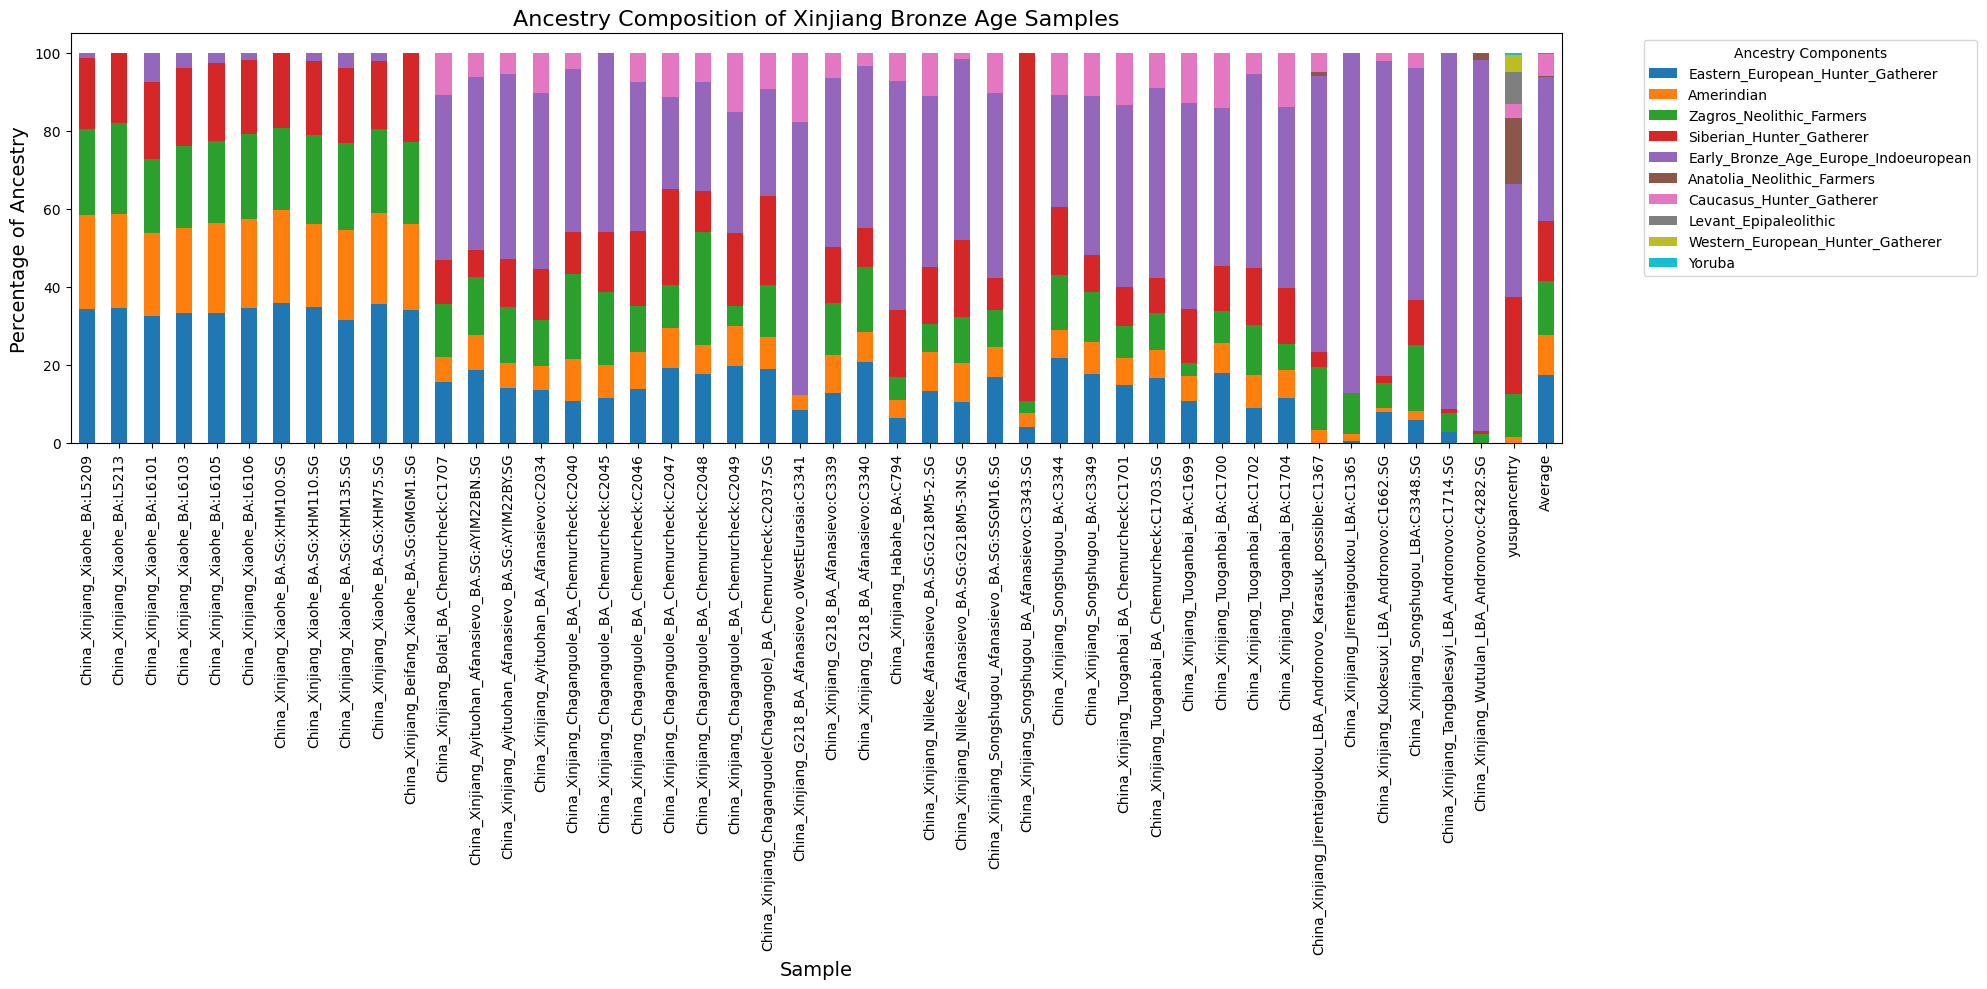

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with actual CSV file)
data = pd.read_csv('output.csv')

# Define the columns for ancestry components
ancestry_components = [
    'Eastern_European_Hunter_Gatherer', 'Amerindian', 'Zagros_Neolithic_Farmers',
    'Siberian_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Levant_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Yoruba'
]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data as a stacked bar chart using Target names for x-axis
data.set_index('Target')[ancestry_components].plot(kind='bar', stacked=True, ax=ax, legend=True)

# Customize the plot
ax.set_title('Ancestry Composition of Xinjiang Bronze Age Samples', fontsize=16)
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('Percentage of Ancestry', fontsize=14)
ax.legend(title='Ancestry Components', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()


In [47]:
import pandas as pd

# Data as a string
data = """Target,Distance,Amerindian,Anatolia_Neolithic_Farmers,Caucasus_Hunter_Gatherer,Early_Bronze_Age_Europe_Indoeuropean,Eastern_European_Hunter_Gatherer,Levant_Epipaleolithic,North_Africa_Epipaleolithic,Siberian_Hunter_Gatherer,Western_European_Hunter_Gatherer,Yoruba,Zagros_Neolithic_Farmers
China_Xinjiang_Xiaohe_BA:L5209,0.20618299,24.0,0.0,0.0,1.4,34.4,0.0,0.0,18.2,0.0,0.0,22.0
China_Xinjiang_Xiaohe_BA:L5213,0.19840075,24.0,0.0,0.0,0.0,34.6,0.0,0.0,18.0,0.0,0.0,23.4
China_Xinjiang_Xiaohe_BA:L6101,0.18298817,21.2,0.0,0.0,7.0,32.8,0.0,0.0,19.8,0.0,0.0,19.2
China_Xinjiang_Xiaohe_BA:L6103,0.19897374,22.0,0.0,0.0,3.8,33.2,0.0,0.0,20.2,0.0,0.0,20.8
China_Xinjiang_Xiaohe_BA:L6105,0.20897197,23.2,0.0,0.0,2.6,33.2,0.0,0.0,20.0,0.0,0.0,21.0
China_Xinjiang_Xiaohe_BA:L6106,0.19634048,22.8,0.0,0.0,1.8,34.6,0.0,0.0,19.0,0.0,0.0,21.8
China_Xinjiang_Xiaohe_BA.SG:XHM100.SG,0.20210203,23.6,0.0,0.0,0.0,36.0,0.0,0.0,19.2,0.0,0.0,21.2
China_Xinjiang_Xiaohe_BA.SG:XHM110.SG,0.19498016,21.4,0.0,0.0,2.2,34.8,0.0,0.0,18.8,0.0,0.0,22.8
China_Xinjiang_Xiaohe_BA.SG:XHM135.SG,0.19453649,23.0,0.0,0.0,4.0,31.6,0.0,0.0,19.2,0.0,0.0,22.2
China_Xinjiang_Xiaohe_BA.SG:XHM75.SG,0.20782666,23.4,0.0,0.0,2.0,35.6,0.0,0.0,17.4,0.0,0.0,21.6
China_Xinjiang_Beifang_Xiaohe_BA.SG:GMGM1.SG,0.19207837,22.0,0.0,0.0,0.0,34.2,0.0,0.0,22.8,0.0,0.0,21.0
China_Xinjiang_Bolati_BA_Chemurcheck:C1707,0.10358884,6.4,0.0,10.8,42.4,15.6,0.0,0.0,11.2,0.0,0.0,13.6
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BN.SG,0.09825104,8.8,0.0,6.2,44.4,18.8,0.0,0.0,6.8,0.0,0.0,15.0
China_Xinjiang_Ayituohan_Afanasievo_BA.SG:AYIM22BY.SG,0.09986119,6.6,0.0,5.4,47.4,14.0,0.0,0.0,12.4,0.0,0.0,14.2
China_Xinjiang_Ayituohan_BA_Afanasievo:C2034,0.08994669,6.2,0.0,10.2,45.2,13.6,0.0,0.0,13.2,0.0,0.0,11.6
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2040,0.10188766,10.8,0.0,4.2,41.6,10.8,0.0,0.0,10.8,0.0,0.0,21.8
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2045,0.09693696,8.6,0.0,0.0,45.8,11.4,0.0,0.0,15.6,0.0,0.0,18.6
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2046,0.11218144,9.6,0.0,7.6,38.0,13.8,0.0,0.0,19.4,0.0,0.0,11.6
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2047,0.10854949,10.2,0.0,11.4,23.4,19.2,0.0,0.0,24.6,0.0,0.0,11.2
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2048,0.10077308,7.6,0.0,7.4,28.0,17.6,0.0,0.0,10.4,0.0,0.0,29.0
China_Xinjiang_Chaganguole_BA_Chemurcheck:C2049,0.10284658,10.2,0.0,15.2,31.0,19.8,0.0,0.0,18.8,0.0,0.0,5.0
China_Xinjiang_Chaganguole(Chagangole)_BA_Chemurcheck:C2037.SG,0.10119117,8.2,0.0,9.2,27.6,19.0,0.0,0.0,22.8,0.0,0.0,13.2
China_Xinjiang_G218_BA_Afanasievo_oWestEurasia:C3341,0.08198052,4.0,0.0,17.8,69.8,8.4,0.0,0.0,0.0,0.0,0.0,0.0
China_Xinjiang_G218_BA_Afanasievo:C3339,0.10720997,9.8,0.0,6.4,43.4,12.8,0.0,0.0,14.4,0.0,0.0,13.2
China_Xinjiang_G218_BA_Afanasievo:C3340,0.08885191,7.6,0.0,3.4,41.4,20.8,0.0,0.0,10.2,0.0,0.0,16.6
China_Xinjiang_Habahe_BA:C794,0.07646363,4.6,0.0,7.2,58.8,6.4,0.0,0.0,17.0,0.0,0.0,6.0
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-2.SG,0.11250853,10.2,0.0,11.0,43.6,13.4,0.0,0.0,14.6,0.0,0.0,7.2
China_Xinjiang_Nileke_Afanasievo_BA.SG:G218M5-3N.SG,0.10473434,10.0,0.0,1.6,46.4,10.4,0.0,0.0,19.6,0.0,0.0,12.0
China_Xinjiang_Songshugou_Afanasievo_BA.SG:SSGM16.SG,0.11517787,7.8,0.0,10.4,47.6,16.8,0.0,0.0,8.2,0.0,0.0,9.2
China_Xinjiang_Songshugou_BA_Afanasievo:C3343.SG,0.04073556,3.6,0.0,0.0,0.0,4.2,0.0,0.0,89.2,0.0,0.0,3.0
China_Xinjiang_Songshugou_BA:C3344,0.10278829,7.2,0.0,10.8,28.6,21.8,0.0,0.0,17.6,0.0,0.0,14.0
China_Xinjiang_Songshugou_BA:C3349,0.11490959,8.0,0.0,11.2,40.4,18.0,0.0,0.0,9.4,0.0,0.0,13.0
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1701,0.09002086,7.0,0.0,13.4,46.6,14.8,0.0,0.0,10.0,0.0,0.0,8.2
China_Xinjiang_Tuoganbai_BA_Chemurcheck:C1703.SG,0.09404769,7.2,0.0,9.0,49.0,16.4,0.0,0.0,9.0,0.0,0.0,9.4
China_Xinjiang_Tuoganbai_BA:C1699,0.09959228,6.4,0.0,12.8,52.8,10.8,0.0,0.0,14.0,0.0,0.0,3.2
China_Xinjiang_Tuoganbai_BA:C1700,0.10505185,7.6,0.0,14.2,40.4,18.0,0.0,0.0,11.6,0.0,0.0,8.2
China_Xinjiang_Tuoganbai_BA:C1702,0.08891918,8.4,0.0,5.4,49.8,9.0,0.0,0.0,14.6,0.0,0.0,12.8
China_Xinjiang_Tuoganbai_BA:C1704,0.10721369,7.2,0.0,13.8,46.6,11.6,0.0,0.0,14.2,0.0,0.0,6.6
China_Xinjiang_Jirentaigoukou_LBA_Andronovo_Karasuk_possible:C1367,0.02937579,3.4,1.0,5.0,70.8,0.0,0.0,0.0,3.6,0.0,0.0,16.2
China_Xinjiang_Jirentaigoukou_LBA:C1365,0.02977965,2.0,0.0,0.0,87.2,0.4,0.0,0.0,0.0,0.0,0.0,10.4
China_Xinjiang_Kuokesuxi_LBA_Andronovo:C1662.SG,0.03122842,1.0,0.0,2.0,80.8,8.0,0.0,0.0,1.8,0.0,0.0,6.4
China_Xinjiang_Songshugou_LBA:C3348.SG,0.03319035,2.4,0.0,3.8,59.6,5.8,0.0,0.0,11.4,0.0,0.0,17.0
China_Xinjiang_Tangbalesayi_LBA_Andronovo:C1714.SG,0.03552786,0.0,0.0,0.0,91.4,2.8,0.0,0.0,1.0,0.0,0.0,4.8
China_Xinjiang_Wutulan_LBA_Andronovo:C4282.SG,0.03698032,0.0,1.8,0.0,95.2,0.0,0.0,0.0,0.6,0.0,0.0,2.4
Uygur:GRC10041341_Uygur06,0.08976512,0.0,15.0,4.6,0.0,0.0,0.0,1.2,64.0,2.6,0.0,12.6
Uygur:GRC10041342_Uygur12,0.06365158,0.4,11.2,3.6,15.8,0.0,0.0,0.0,45.6,0.0,0.0,23.4
Uygur:GRC10045054_Uygur13,0.08150544,0.0,8.2,6.8,14.2,0.0,1.2,0.8,47.4,2.6,0.0,18.8
Uygur:GRC10045055_Uygur14,0.07595639,0.0,13.6,7.0,3.2,0.0,0.0,0.0,54.8,3.2,0.0,18.2
Uygur:GRC10045056_Uygur16,0.09420424,0.0,14.6,9.0,0.0,0.0,0.6,0.0,61.4,3.0,0.0,11.4
Uygur:GRC10045057_Uygur18,0.06484919,0.8,10.4,9.4,14.2,0.0,0.0,0.0,42.6,1.0,0.0,21.6
Uygur:GRC10045058_Uygur31,0.06272991,0.0,11.6,0.0,17.4,0.0,0.0,0.0,46.2,0.8,0.0,24.0
Uygur:GRC10045060_Uygur33,0.06955714,0.4,12.6,7.8,7.8,0.0,2.0,0.0,51.0,3.0,0.6,14.8
Uygur:GRC10045061_Uygur41,0.11092189,0.0,11.2,0.0,0.0,0.0,1.0,1.8,66.6,2.2,0.0,17.2
Uygur:GRC10045064_Uygur49,0.09009194,0.0,12.6,8.4,0.0,0.0,2.0,0.0,60.2,2.8,0.0,14.0
Uygur:GRC10045065_Uygur53,0.07382992,0.0,8.0,1.6,16.4,0.0,0.0,0.8,50.0,1.6,0.0,21.6
Uygur:GRC10045066_Uygur55,0.07656304,0.0,12.8,6.4,1.0,0.0,0.0,0.0,56.8,5.2,0.0,17.8
Uygur:HGDP01297,0.07682293,0.0,11.6,7.0,9.2,0.0,1.2,0.0,50.8,2.0,0.0,18.2
Uygur:HGDP01298,0.06904984,0.0,10.2,7.4,11.4,0.0,1.6,0.2,47.2,2.2,0.0,19.8
Uygur:HGDP01299,0.08101489,0.0,12.8,3.8,7.2,0.0,0.0,0.0,54.8,2.6,0.0,18.8
Uygur:HGDP01300,0.06235100,0.0,10.8,4.0,10.8,0.0,0.0,0.0,51.0,2.4,0.0,21.0
Uygur:HGDP01301,0.07159276,0.0,12.0,4.4,3.4,0.0,0.0,1.4,55.0,4.4,0.0,19.4
yusupancentry,0.09729617,1.6,16.8,3.8,29.0,0.0,8.2,0.0,24.8,4.2,0.6,11.0
Average,0.10382964,7.6,3.5,5.5,28.9,12.6,0.3,0.1,25.8,0.7,0.0,14.9


"""

# Convert the string data to a DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Save as CSV
df.to_csv("output.csv", index=False)

print("CSV file saved as 'output.csv'")


CSV file saved as 'output.csv'


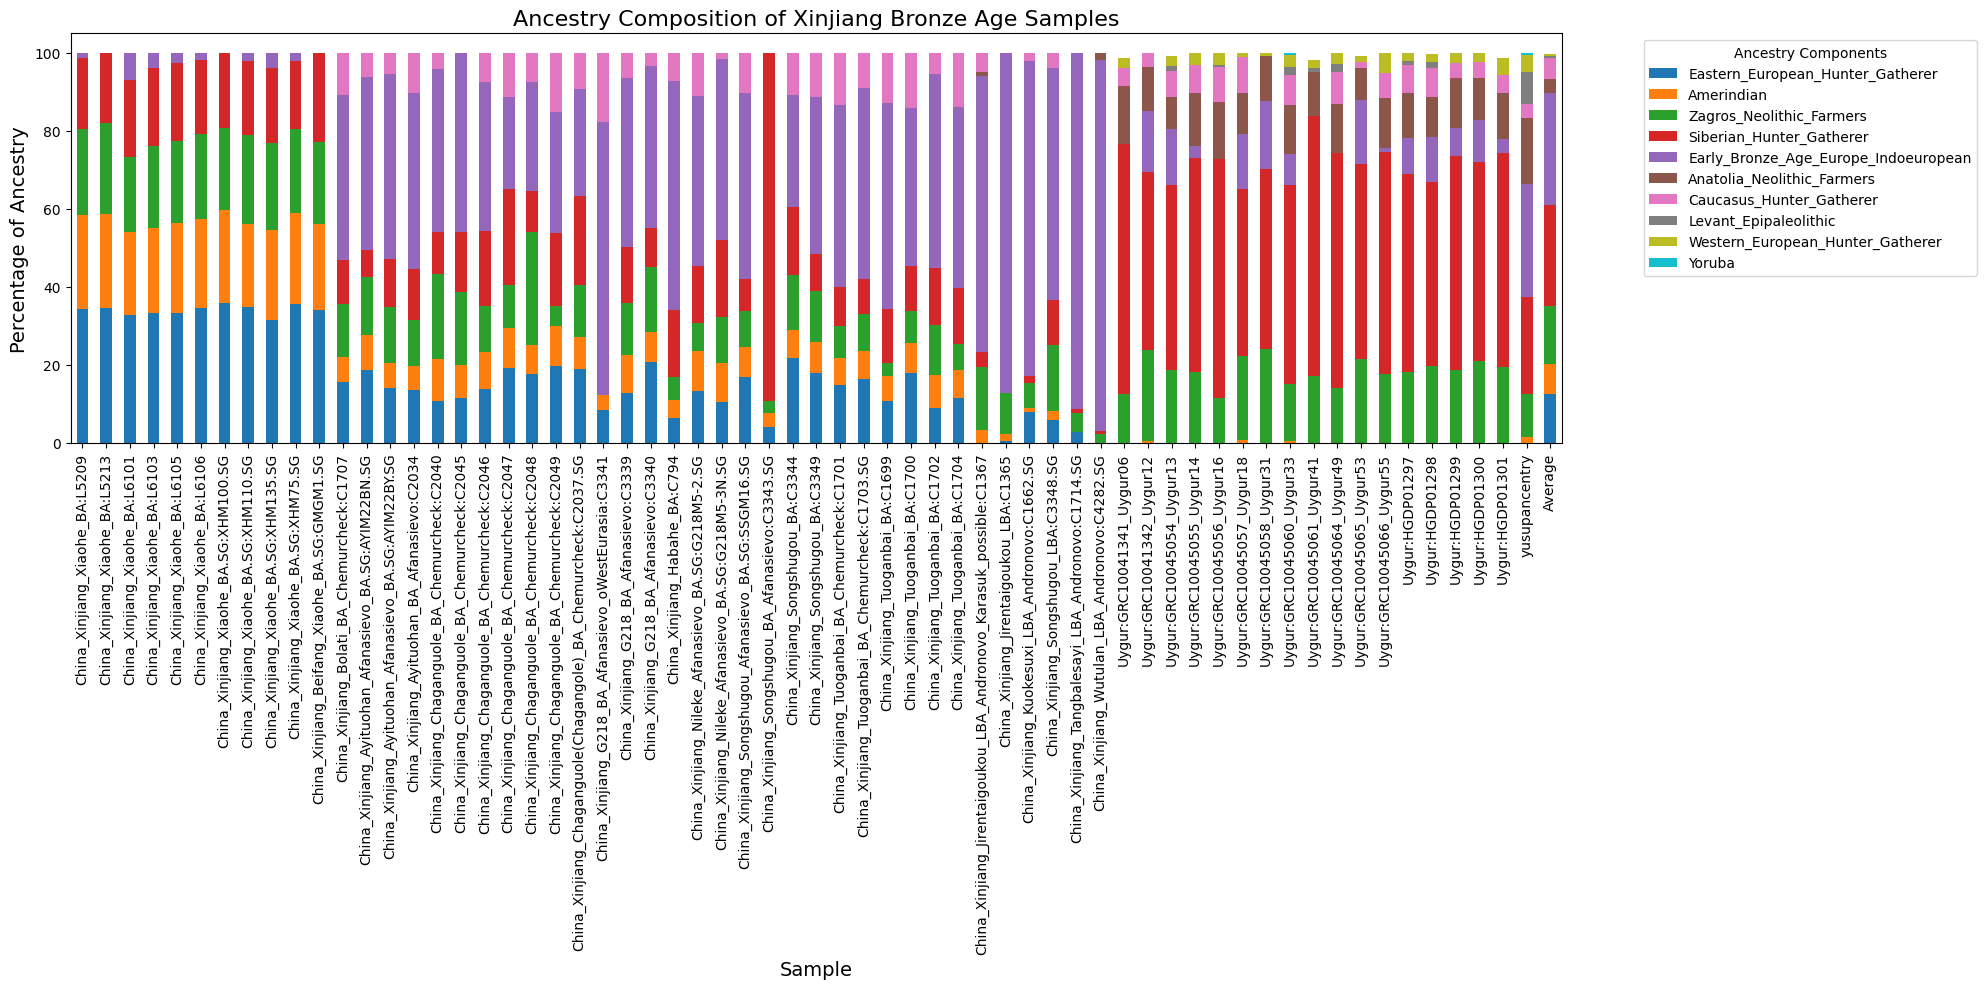

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with actual CSV file)
data = pd.read_csv('output.csv')

# Define the columns for ancestry components
ancestry_components = [
    'Eastern_European_Hunter_Gatherer', 'Amerindian', 'Zagros_Neolithic_Farmers',
    'Siberian_Hunter_Gatherer', 'Early_Bronze_Age_Europe_Indoeuropean',
    'Anatolia_Neolithic_Farmers', 'Caucasus_Hunter_Gatherer', 'Levant_Epipaleolithic',
    'Western_European_Hunter_Gatherer', 'Yoruba'
]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data as a stacked bar chart using Target names for x-axis
data.set_index('Target')[ancestry_components].plot(kind='bar', stacked=True, ax=ax, legend=True)

# Customize the plot
ax.set_title('Ancestry Composition of Xinjiang Bronze Age Samples', fontsize=16)
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('Percentage of Ancestry', fontsize=14)
ax.legend(title='Ancestry Components', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()
